In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pickle
import random
from tqdm import tqdm
import wandb

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [37]:
class PolypDataset(Dataset):
    def __init__(self, image_dir, mask_dir, csv_file, transform=None):
        self.img_paths = []
        self.labels = []
        self.images = []
        self.masks = []
        self.cropped_polyps = []
        self.transform = transform
        
               
        self.dic_label2idx = {'AD': 0, 'ASS': 1, 'HP': 2}
        
        self.df = pd.read_csv(csv_file)
        
        for i, img_id in enumerate(self.df['image_id']):
            img_path = f"{os.path.join(image_dir, str(img_id))}.tif"
            mask_path = f"{os.path.join(mask_dir, str(img_id))}.tif"
            
            img = Image.open(img_path).convert("RGB")
            mask = Image.open(mask_path).convert("L")
            
            mask = np.array(mask)
            mask = mask > 0
            
            img = np.array(img)
            masked_image = img * np.expand_dims(mask, axis=-1)
            masked_image = Image.fromarray(masked_image)
            
            self.images.append(img)
            self.masks.append(mask)
            self.cropped_polyps.append(masked_image)
            self.labels.append(self.dic_label2idx[self.df['cls'][i]])
            
            print(f"Processed {i}/{len(self.df)} images")
        
            
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.cropped_polyps[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label
        
    
    def visualize_image(self, image, mask, masked_image):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            
        ax[0].imshow(image)
        ax[0].set_title("Original Image")
        ax[0].axis('off')
        
        # Masked region (polyp region only)
        ax[1].imshow(mask, cmap="gray")
        ax[1].set_title("Mask (Polyp Region)")
        ax[1].axis('off')

        # Image with mask applied
        ax[2].imshow(masked_image)
        ax[2].set_title("Masked Image (Polyp Extracted)")
        ax[2].axis('off')
        
        plt.show()

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [38]:
transform = transforms.Compose([
    transforms.Resize((224, 224), antialias=True),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


train_file_path = './data/train_set.pkl'
if os.path.exists(train_file_path):
    with open(train_file_path, 'rb') as f:
        train_set = pickle.load(f)
    print("File already exsits. Loading...")

else:
    train_set = PolypDataset(image_dir="./data/m_train2/m_train/images",
                            mask_dir="./data/m_train2/m_train/masks",
                            csv_file="./data/m_train2/m_train/train.csv",
                            transform=transform
    )
    with open(train_file_path, "wb") as f:
        pickle.dump(train_set, f)
    
    print(f"File saved at {train_file_path}")


val_file_path = './data/val_set.pkl'
if os.path.exists(val_file_path):
    with open(val_file_path, 'rb') as f:
        val_set = pickle.load(f)
    print("File already exsits. Loading...")
    
else:
    val_set = PolypDataset(image_dir="./data/m_valid/m_valid/images",
                        mask_dir="./data/m_valid/m_valid/masks",
                        csv_file="./data/m_valid/m_valid/valid.csv",
                        transform=transform
    )
    with open(val_file_path, "wb") as f:
        pickle.dump(val_set, f)
        
    print(f"File saved at {val_file_path}")

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

File already exsits. Loading...
File already exsits. Loading...
Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

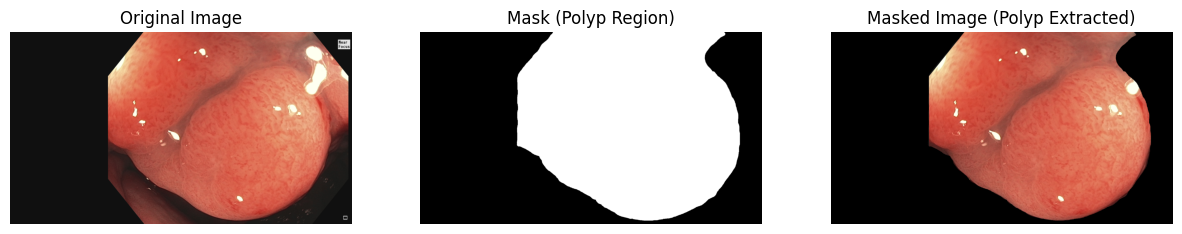

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [39]:
train_set.visualize_image(train_set.images[530], train_set.masks[530], train_set.cropped_polyps[530])

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

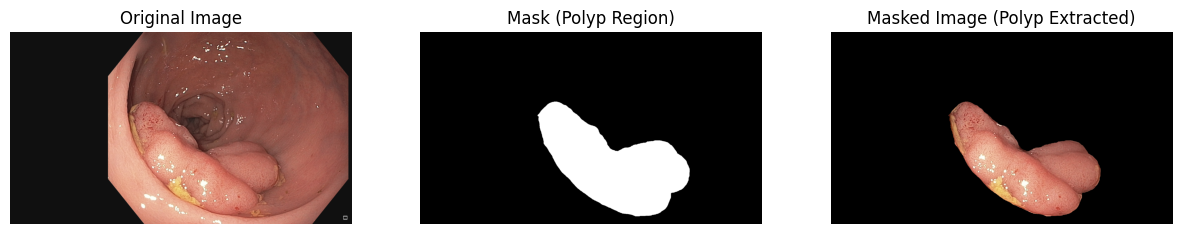

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [40]:
train_set.visualize_image(train_set.images[193], train_set.masks[193], train_set.cropped_polyps[193])

In [41]:
batch_size = 16

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4, drop_last=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=4, drop_last=True)

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


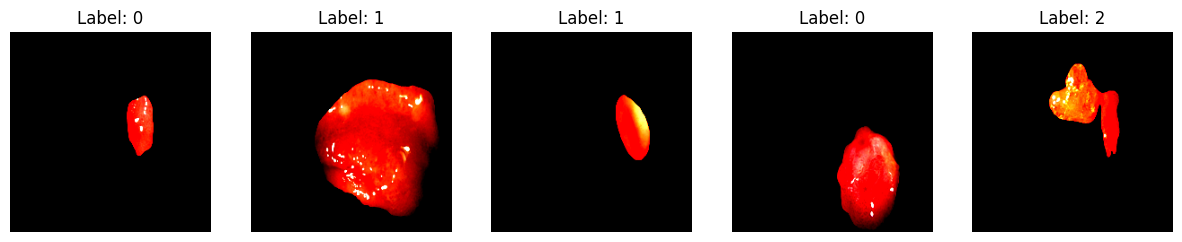

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [42]:
def inspect_batch(dataloader):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    
    images = images.numpy().transpose((0, 2, 3, 1))  # Change shape from (B, C, H, W) to (B, H, W, C)
    
    # Display 5 images
    for i in range(5):
        idx = random.randint(0, len(images)-1)
        ax = axes[i]
        ax.imshow(images[idx])
        ax.set_title(f"Label: {labels[idx].item()}")
        ax.axis("off")

    plt.show()
    
inspect_batch(train_loader)

In [43]:
class PolypClassificationModel(nn.Module):
    def __init__(self, num_classes):
        super(PolypClassificationModel, self).__init__()
        
        self.backbone = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        
        in_features = self.backbone.classifier[1].in_features
        
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        return self.backbone(x)

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

def train(num_epochs, model, train_loader, val_loader, optimizer, criterion, n_early_stopping, path_model=None, scheduler=None):
    best_val_loss = float('inf')
    train_loss_hist = []
    val_loss_hist = []
    early_stopping = 0

    model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        train_loss = 0.0
        correct_preds = 0
        total_preds = 0

        train_loader_tqdm = tqdm(train_loader, desc=f"Training", unit="batch")

        for batch in train_loader_tqdm:
            optimizer.zero_grad()  # Clear gradients
            
            # Extract inputs and labels
            images = batch[0].to(device)  # Assuming first element is images
            labels = batch[1].to(device)  # Assuming second element is labels

            logits = model(images)
            loss = criterion(logits, labels)

            _, predicted_labels = torch.max(logits, dim=1)  
            correct_preds += (predicted_labels == labels).sum().item()
            total_preds += labels.size(0)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_loader_tqdm.set_postfix(loss=loss.item())

        avg_train_loss = train_loss / len(train_loader)
        train_acc = correct_preds / total_preds
        train_loss_hist.append(avg_train_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_acc:.4f}")

        # Log training metrics to WandB
        wandb.log({"train_loss": avg_train_loss, "train_accuracy": train_acc, "epoch": epoch + 1})

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0

        with torch.no_grad():
            val_loader_tqdm = tqdm(val_loader, desc="Validation", unit="batch")

            for batch in val_loader_tqdm:
                images = batch[0].to(device)
                labels = batch[1].to(device)

                logits = model(images)
                loss = criterion(logits, labels)

                _, predicted_labels = torch.max(logits, dim=1)
                val_correct_preds += (predicted_labels == labels).sum().item()
                val_total_preds += labels.size(0)

                val_loss += loss.item()
                val_loader_tqdm.set_postfix(loss=loss.item())

        avg_val_loss = val_loss / len(val_loader)
        val_acc = val_correct_preds / val_total_preds
        val_loss_hist.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.4f}")

        # Log validation metrics to WandB
        wandb.log({"val_loss": avg_val_loss, "val_accuracy": val_acc, "epoch": epoch + 1})

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), path_model)
            wandb.run.summary["best_val_loss"] = best_val_loss
        else:
            early_stopping += 1
            print(f"Early stopping: {early_stopping}")

        if early_stopping == n_early_stopping:
            print(f"Stopping early at epoch {epoch+1} with best loss of {best_val_loss}.\nBest model: {path_model}")
            break

        if scheduler:
            scheduler.step()

    wandb.finish()
    return train_loss_hist, val_loss_hist


Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

cpu
Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [45]:
polyp_model = PolypClassificationModel(num_classes=len(train_set.dic_label2idx))

# Hyperparameters
learning_rate = 0.0001
num_epochs = 100
early_stopping = 10

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(polyp_model.parameters(), lr=learning_rate)


wandb.init(project="polyp-classification", config={
    "epochs": num_epochs,
    "batch_size": batch_size,
    "loss_function": "CrossEntropyLoss",
    "optimizer": "Adam",
    "learning_rate": learning_rate,
    "model": "model1",
    "scheduler": "None",
    "early_stopping": 10
})

train_loss_hist, val_loss_hist = train(num_epochs, polyp_model, train_loader, val_loader, optimizer, criterion,
                                       n_early_stopping=10,
                                       path_model='./models/classification/model1.pth')

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f001118bc10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

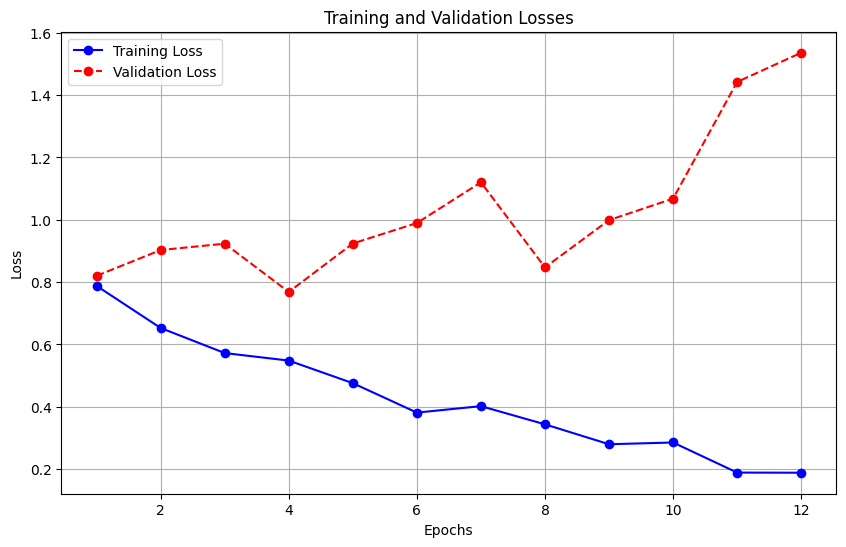

In [ ]:
def plot_loss(train_loss_hist, val_loss_hist):
    plt.figure(figsize=(10, 6))
    
    # Plotting training loss
    plt.plot(range(1, len(train_loss_hist) + 1), train_loss_hist, label="Training Loss", color="blue", linestyle='-', marker='o')
    
    # Plotting validation loss
    plt.plot(range(1, len(val_loss_hist) + 1), val_loss_hist, label="Validation Loss", color="red", linestyle='--', marker='o')
    
    plt.title("Training and Validation Losses")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(train_loss_hist, val_loss_hist)


In [ ]:
def test(